In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

<div>
    <h2>
        Show graph function
    </h2>
</div>

In [15]:
def show_graph(adjacency_matrix, labels=None, node_size=500):
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, node_size=node_size, node_color=np.array(colors)[list(gr.nodes)] if labels is not None else None)
    plt.show()



<div>
    <h2>
        Reading dataset
    </h2>
</div>

In [12]:
adj_final = np.zeros((100, 100))
file1 = open('data/data.txt', 'r')
lines = file1.readlines()
print(len(lines))
for l in lines:
    i, j = l.split()
    adj_final[int(i) - 1, int(j) - 1] = 1
    adj_final[int(j) - 1, int(i) - 1] = 1

771


<div>
    <h2>
        Clustering to 2 and 4 clusters
    </h2>
</div>

In [13]:
lapl2 = np.diag(np.sum(adj_final, axis=1).flatten()) - adj_final
eigenValues2, eigenVectors2 = np.linalg.eig(lapl2)
idx2 = np.argsort(eigenValues2)
eigenValues2 = eigenValues2[idx2]
eigenVectors2 = eigenVectors2[:,idx2]
vector3 = np.zeros(( np.shape(adj_final)[0],), dtype=int)
for i in range(np.shape(adj_final)[0]):
    if (eigenVectors2[i,1] <= 0):
        vector3[i] = 1
    else:
        vector3[i] = 2
vector4 = np.zeros(( np.shape(adj_final)[0],), dtype=int)
for i in range(np.shape(adj_final)[0]):
    if eigenVectors2[i,1] <= 0 and eigenVectors2[i,2] <= 0:
        vector4[i] = 1
    elif eigenVectors2[i,1] <= 0 and eigenVectors2[i,2] > 0:
        vector4[i] = 2
    elif eigenVectors2[i,1] > 0 and eigenVectors2[i,2] > 0:
        vector4[i] = 3
    else:
        vector4[i] = 4


<div dir="rtl">
    گراف‌هایی که با ۲ و ۴ خوشه، خوشه‌بندی کردید را توسط تابع show_graph نمایش دهید.
</div>

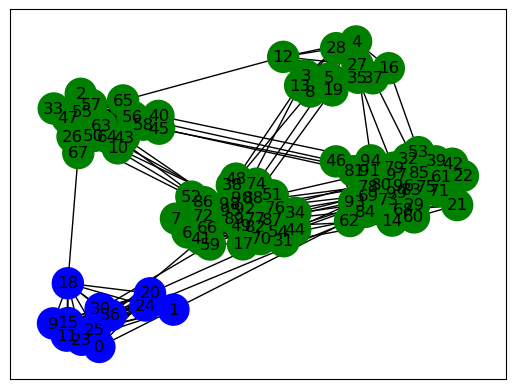

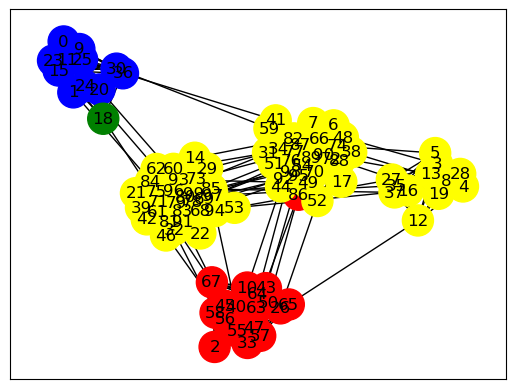

In [14]:
show_graph(adj_final, vector3)
show_graph(adj_final, vector4)